In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sys
import os
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [115]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from outliener import Outlier
from visualization import *


### Data Reading 

In [86]:
df= pd.read_csv("../data/user_overviewed_data.csv")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146887 entries, 0 to 146886
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        146887 non-null  int64  
 1   Bearer Id                         146887 non-null  float64
 2   Start                             146887 non-null  object 
 3   Start ms                          146887 non-null  float64
 4   End                               146887 non-null  object 
 5   End ms                            146887 non-null  float64
 6   Dur. (ms)                         146887 non-null  float64
 7   IMSI                              146887 non-null  float64
 8   MSISDN/Number                     146887 non-null  float64
 9   IMEI                              146887 non-null  float64
 10  Last Location Name                146887 non-null  object 
 11  Avg RTT DL (ms)                   146887 non-null  f

In [88]:
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00
2,2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00,1726277.00,10229119.00,3363124.00,34425237.00,23751202.00,229980251.00,414908351.00,307690973.00
3,3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00,657493.00,11811761.00,2070983.00,36534765.00,15092588.00,810387875.00,761837216.00,889352748.00
4,4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00,912788.00,7748843.00,2110349.00,34222253

In [89]:
df = df.drop("Unnamed: 0", axis=1)

In [90]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00
2,13114483484080500736.00,2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,1361762.00,208200314458056.00,33760627129.00,35281510359387.00,D42335A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1361762651.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00,1684053.00,42224.00,8535055.00,1694064.00,2690151.00,672973.00,19725661.00,14699576.00,17587794.00,6163408.00,229584621.00,395630.00,410692588.00,4215763.00,27883638.00,279807335.00,1726277.00,10229119.00,3363124.00,34425237.00,23751202.00,229980251.00,414908351.00,307690973.00
3,13114483485442799616.00,2019-04-10 00:31:00,486.00,2019-04-25 07:36:00,171.00,1321509.00,208201402342131.00,33750343200.00,35356610164913.00,T21824A,65.00,5.00,44.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,3330.00,37882.00,1321509685.00,unknown,unknown,17.00,207.00,644121.00,13372.00,9023734.00,2788027.00,1439754.00,631229.00,21388122.00,15146643.00,13994646.00,1097942.00,799538153.00,10849722.00,749039933.00,12797283.00,43324218.00,846028530.00,657493.00,11811761.00,2070983.00,36534765.00,15092588.00,810387875.00,761837216.00,889352748.00
4,13114483499480700928.00,2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,1089009.00,208201401415120.00,33699795932.00,35407009745539.00,D88865A,65.00,5.00,6.00,9.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,1089009389.00,Samsung,Samsung Sm-G390F,607.00,604.00,862600.00,50188.00,6248284.00,1500559.00,1936496.00,173853.00,15259380.00,18962873.00,17124581.00,415218.00,527707248.00,3529801.00,550709500.00,13910322.00,38542814.00,569138589.00,912788.00,7748843.00,2110349.00,34222253.00,17539799.00,53123

In [91]:
# Sessions frequency

ms_gorup = df.groupby("MSISDN/Number")
sessions_frequency = ms_gorup.agg({"Bearer Id": "count"})
#session_frequency = columen.
Top = sessions_frequency.sort_values(by='Bearer Id', ascending=False)
Top.head(10)

,Bearer Id
MSISDN/Number,
33626320676.00,18
33625779332.00,17
33614892860.00,17
33659725664.00,16
33675877202.00,15
33760536639.00,15
33667163239.00,13
33604515716.00,12
33760413819.00,12


In [92]:
duration_session = df.groupby(['MSISDN/Number']).agg({'Dur. (ms)':'sum'})
duration_session

,Dur. (ms)
MSISDN/Number,
33601001722.00,116720.00
33601001754.00,181230.00
33601002511.00,134969.00
33601007832.00,49878.00
33601008617.00,37104.00
...,...
33789967113.00,160461.00
33789980299.00,210389.00
33789996170.00,8810.00


In [93]:
total_trafic = df.groupby(['MSISDN/Number']).agg({'Total Data Volume (Bytes)':'sum'})
total_trafic

,Total Data Volume (Bytes)
MSISDN/Number,
33601001722.00,878690574.00
33601001754.00,156859643.00
33601002511.00,595966483.00
33601007832.00,422320698.00
33601008617.00,1457410944.00
...,...
33789967113.00,208123067.00
33789980299.00,1094693386.00
33789996170.00,714641641.00



## Task 2.1

###### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [94]:
top_engagement = df.groupby(
    'MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})

top_engagement=top_engagement.rename(columns ={'Bearer Id': 'xDR Sessions'}).nlargest(10,'xDR Sessions')
top_engagement

,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33626320676.00,18,8791927.00,7971167261.00
33614892860.00,17,9966898.00,8846226494.00
33625779332.00,17,18553754.00,8499620722.00
33659725664.00,16,4035428.00,7705862783.00
33675877202.00,15,4865947.00,7891110608.00
33760536639.00,15,9279434.00,8514773963.00
33667163239.00,13,8744914.00,5618394054.00
33603127838.00,12,6287761.00,4976195043.00
33604515716.00,12,5207990.00,5487855293.00


In [95]:
top_engagement.nlargest(10,'Dur. (ms)')

,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33625779332.00,17,18553754.00,8499620722.00
33614892860.00,17,9966898.00,8846226494.00
33760536639.00,15,9279434.00,8514773963.00
33626320676.00,18,8791927.00,7971167261.00
33667163239.00,13,8744914.00,5618394054.00
33603127838.00,12,6287761.00,4976195043.00
33604515716.00,12,5207990.00,5487855293.00
33675877202.00,15,4865947.00,7891110608.00
33627080969.00,12,4703516.00,5754730859.00


In [96]:
top_engagement.nlargest(10,'Total Data Volume (Bytes)')

,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860.00,17,9966898.00,8846226494.00
33760536639.00,15,9279434.00,8514773963.00
33625779332.00,17,18553754.00,8499620722.00
33626320676.00,18,8791927.00,7971167261.00
33675877202.00,15,4865947.00,7891110608.00
33659725664.00,16,4035428.00,7705862783.00
33627080969.00,12,4703516.00,5754730859.00
33667163239.00,13,8744914.00,5618394054.00
33604515716.00,12,5207990.00,5487855293.00


In [97]:
df_outliers= Outlier(top_engagement)
df_outliers.getOverview().T

label,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
Q1,12.25,4951457.75,5652478255.25
median,15.00,7516337.50,7798486695.50
Q3,16.75,9157557.25,8367507356.75
IQR,4.50,4206099.50,2715029101.50
skew,-0.02,1.78,-0.37
number_of_outliers,0,1,0
percentage_of_outliers,0.0%,10.0%,0.0%
min_value,12.00,4035428.00,4976195043.00
max_value,18.00,18553754.00,8846226494.00
mean,14.70,8043756.90,7126593708.00


#### Normalizing and standardizing for K means clustering

In [98]:
df_outliers= Outlier(top_engagement)
df_outliers.getOverview().T


label,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
Q1,12.25,4951457.75,5652478255.25
median,15.00,7516337.50,7798486695.50
Q3,16.75,9157557.25,8367507356.75
IQR,4.50,4206099.50,2715029101.50
skew,-0.02,1.78,-0.37
number_of_outliers,0,1,0
percentage_of_outliers,0.0%,10.0%,0.0%
min_value,12.00,4035428.00,4976195043.00
max_value,18.00,18553754.00,8846226494.00
mean,14.70,8043756.90,7126593708.00


In [99]:
df_outliers.replace_outliers_with_iqr(
    ['xDR Sessions', 'Dur. (ms)', 'Total Data Volume (Bytes)'])
df_outliers = Outlier(top_engagement)
df_outliers.getOverview().T

label,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
Q1,12.25,4951457.75,5652478255.25
median,15.00,7516337.50,7798486695.50
Q3,16.75,9157557.25,8367507356.75
IQR,4.50,4206099.50,2715029101.50
skew,-0.02,1.18,-0.37
number_of_outliers,0,0,0
percentage_of_outliers,0.0%,0.0%,0.0%
min_value,12.00,4035428.00,4976195043.00
max_value,18.00,15466706.50,8846226494.00
mean,14.70,7735052.15,7126593708.00


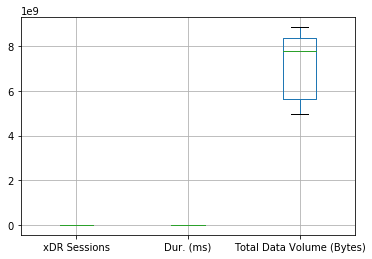

In [100]:
top_engagement.boxplot()

In [101]:
# scale data
scaler = StandardScaler()


In [102]:
scaled_data = scaler.fit_transform(top_engagement)
pd.DataFrame(scaled_data).head(5)


,0,1,2
0,1.50,0.32,0.60
1,1.05,0.68,1.22
2,1.05,2.34,0.97
3,0.59,-1.12,0.41
4,0.14,-0.87,0.54


In [103]:
data_normalized = normalize(scaled_data)
pd.DataFrame(data_normalized).head(5)



,0,1,2
0,0.91,0.19,0.36
1,0.60,0.39,0.70
2,0.38,0.85,0.35
3,0.44,-0.84,0.31
4,0.13,-0.84,0.52


In [104]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([0, 0, 0, 2, 2, 0, 1, 1, 1, 1])

In [105]:
top_engagement.insert(0, 'cluster', kmeans.labels_)
top_engagement

,cluster,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33626320676.00,0,18.00,8791927.00,7971167261.00
33614892860.00,0,17.00,9966898.00,8846226494.00
33625779332.00,0,17.00,15466706.50,8499620722.00
33659725664.00,2,16.00,4035428.00,7705862783.00
33675877202.00,2,15.00,4865947.00,7891110608.00
33760536639.00,0,15.00,9279434.00,8514773963.00
33667163239.00,1,13.00,8744914.00,5618394054.00
33603127838.00,1,12.00,6287761.00,4976195043.00
33604515716.00,1,12.00,5207990.00,5487855293.00


In [106]:
top_engagement['cluster'].value_counts()

0    4
1    4
2    2
Name: cluster, dtype: int64

In [107]:
top_engagement.head()

,cluster,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33626320676.00,0,18.00,8791927.00,7971167261.00
33614892860.00,0,17.00,9966898.00,8846226494.00
33625779332.00,0,17.00,15466706.50,8499620722.00
33659725664.00,2,16.00,4035428.00,7705862783.00
33675877202.00,2,15.00,4865947.00,7891110608.00


In [108]:
fig= px.scatter(top_engagement, x="Total Data Volume (Bytes)", y= 'Dur. (ms)',
                 color='cluster', size='xDR Sessions')
fig.show()

## computing the min , max mean for each cluster

In [109]:
cluster0 = top_engagement[top_engagement["cluster"]==0]
cluster0[['cluster','xDR Sessions', 'Dur. (ms)', 'Total Data Volume (Bytes)']].describe()

,cluster,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
count,4.00,4.00,4.00,4.00
mean,0.00,16.75,10876241.38,8457947110.00
std,0.00,1.26,3098033.55,361792520.00
min,0.00,15.00,8791927.00,7971167261.00
25%,0.00,16.50,9157557.25,8367507356.75
50%,0.00,17.00,9623166.00,8507197342.50
75%,0.00,17.25,11341850.12,8597637095.75
max,0.00,18.00,15466706.50,8846226494.00


In [110]:
cluster0 = top_engagement[top_engagement["cluster"]==1]
cluster0[['cluster','xDR Sessions', 'Dur. (ms)', 'Total Data Volume (Bytes)']].describe()

,cluster,xDR Sessions,Dur. (ms),Total Data Volume (Bytes)
count,4.00,4.00,4.00,4.00
mean,1.00,12.25,6236045.25,5459293812.25
std,0.00,0.50,1798391.91,339998095.36
min,1.00,12.00,4703516.00,4976195043.00
25%,1.00,12.00,5081871.50,5359940230.50
50%,1.00,12.00,5747875.50,5553124673.50
75%,1.00,12.25,6902049.25,5652478255.25
max,1.00,13.00,8744914.00,5754730859.00


### Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [111]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,13114483460844900352.00,2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,1823652.00,208201448079117.00,33664962239.00,35521209507511.00,9.16456699548519E+015,42.00,5.00,23.00,44.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,37624.00,38787.00,1823652892.00,Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,1545765.00,24420.00,1634479.00,1271433.00,3563542.00,137762.00,15854611.00,2501332.00,8198936.00,9656251.00,278082303.00,14344150.00,171744450.00,8814393.00,36749741.00,308879636.00,1570185.00,2905912.00,3701304.00,18355943.00,17855187.00,292426453.00,180558843.00,345629377.00
1,13114483482878900224.00,2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,1365104.00,208201909211140.00,33681854413.00,35794009006359.00,L77566A,65.00,5.00,16.00,26.00,19520.00,7230.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,3560.00,1365104371.00,Samsung,Samsung Galaxy J5 (Sm-J530),971.00,1022.00,1926113.00,7165.00,3493924.00,920172.00,629046.00,308339.00,20247395.00,19111729.00,18338413.00,17227132.00,608750074.00,1170709.00,526904238.00,15055145.00,53800391.00,653384965.00,1933278.00,4414096.00,937385.00,39359124.00,35565545.00,609920783.00,541959383.00,707185356.00


In [112]:
application_df = df.groupby(
    'MSISDN/Number').agg({'Social Media Data Volume (Bytes)':'sum','Google Data Volume (Bytes)':'sum','Email Data Volume (Bytes)': 'sum','Youtube Data Volume (Bytes)':'sum','Netflix Data Volume (Bytes)':'sum','Gaming Data Volume (Bytes)':'sum',
                          'Other Data Volume (Bytes)':'sum','Total Data Volume (Bytes)':'sum'})
application_df.nlargest(10,'Total Data Volume (Bytes)')



,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860.00,28294544.00,127973787.00,40788634.00,394370218.00,361401046.00,7749432234.00,7639263572.00,8846226494.00
33760536639.00,39783189.00,123223099.00,33693767.00,396289198.00,334643269.00,7461045228.00,4716134493.00,8514773963.00
33625779332.00,27135500.00,142307915.00,40633966.00,452958769.00,356980607.00,7326673487.00,6354583086.00,8499620722.00
33626320676.00,43374779.00,152191852.00,42418782.00,374483047.00,328725740.00,6887572116.00,8167877776.00,7971167261.00
33675877202.00,19222921.00,109860502.00,31514421.00,317410572.00,309093159.00,6970567597.00,6798515150.00,7891110608.00
33659725664.00,35412358.00,116516345.00,35999792.00,257991088.00,399519079.00,6725559211.00,6317415487.00,7705862783.00
33666464084.00,18629986.00,89320737.00,25557139.00,227336012.00,214416926.00,6646303338.00,4349141478.00,7308500938.00
33760413819.00,20777205.00,82738720.00,25576965.00,303169107.00,318347546.00,6268619592.00,4101645436.00,7132370514.00
33664712899.00,19390599.00,90389372.00,21426007.00,276834013.00,251798809.00,6103856008.00,3976960308.00,6872018208.00


### Plot the top 3 most used applications using appropriate charts.

In [118]:

application_df_sum = application_df.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)','Google Data Volume (Bytes)','Email Data Volume (Bytes)',
                                                            'Youtube Data Volume (Bytes)','Netflix Data Volume (Bytes)','Gaming Data Volume (Bytes)','Other Data Volume (Bytes)']].sum()
largestApps=application_df_sum[['Social Media Data Volume (Bytes)','Google Data Volume (Bytes)','Email Data Volume (Bytes)','Youtube Data Volume (Bytes)',
                               'Netflix Data Volume (Bytes)','Gaming Data Volume (Bytes)','Other Data Volume (Bytes)']].sum().nlargest(3)
 

Text(0.5, 1.0, 'Top 3 Most Used Applications')

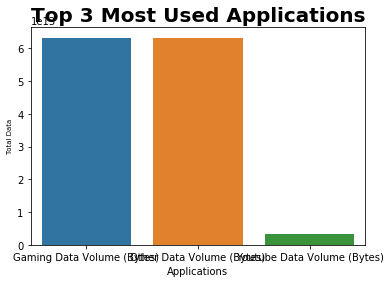

In [129]:
ax=sns.barplot(largestApps.index, largestApps.values) 
ax.set_xlabel('Applications', fontsize=10)
ax.set_ylabel('Total Data' , fontsize=7)
ax.set_title('Top 3 Most Used Applications', fontsize=20,fontweight='bold')